# SENG 474
# Assignment 1 - Problem 8
# Nolan Kurylo
# V00893175


8.1 Linear Regression Equation
$$ 
  \hat{y} =  \omega ^TX 
$$
where,
$$
 \omega = ( X^T X )^{-1} X^Ty
$$


References:

1) https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71

2) https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

3) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

4) https://datatofish.com/multiple-linear-regression-python/

5) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

6) http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

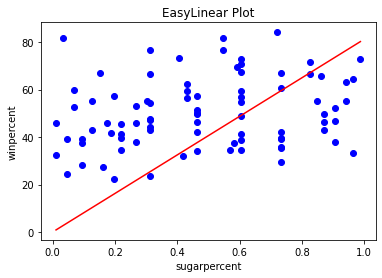

In [4]:
# 8.1 Linear
import pandas as pd
import numpy as np
import pprint
from matplotlib import pyplot as plt


np.random.seed(1337)

df = pd.read_csv('candy_data.csv') # create dataframe of csv
df.sort_values('sugarpercent', inplace=True) # sorting x values helps for plots later on

x_col = df['sugarpercent'].values # x values
y_col = df['winpercent'].values # y values

x_col = x_col.reshape(x_col.shape[0],1) # need to reshape for matrix calculations below


w = np.dot(np.linalg.inv(np.dot(x_col.T, x_col)), np.dot(x_col.T, y_col)) # from equation above
y_hat = np.dot(x_col, w.T) #from equation above

plt.xlabel('sugarpercent')
plt.ylabel('winpercent')

plt.plot(x_col, y_hat, color='red') # plot line
plt.scatter(x_col, y_col,  color='blue') # plot points
plt.title("EasyLinear Plot")
plt.show()


Text(0.5, 1.0, 'EasyLinear Plot')

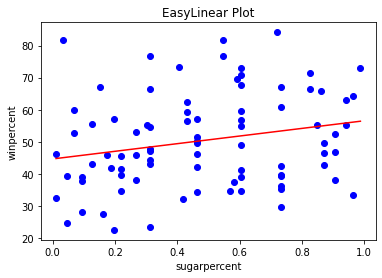

In [5]:
#8.2 EasyLinear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
X = x_col.reshape(-1,1) # reshape columns for scikit-learn library functions
y = y_col.reshape(-1,1)


LinearRegressor = LinearRegression() # generate linear regression model
LinearRegressor.fit(X, y) #training the algorithm

plt.xlabel('sugarpercent')
plt.ylabel('winpercent')
y_prediction = LinearRegressor.predict(X) # obtain the predicted y values

plt.plot(X, y_prediction, color='red') # plot line
plt.scatter(X, y,  color='blue') # plot points
plt.title("EasyLinear Plot")




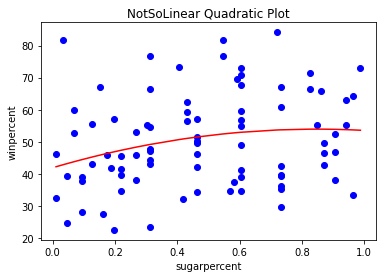

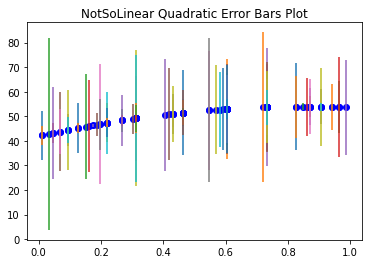

In [6]:
#8.2 NotSoLinear 
# Quadratic Polynomials

from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(2) # degree of 2
X_quad = quadratic.fit_transform(X)

QuadraticRegressor = LinearRegression() # generate linear regression model
QuadraticRegressor.fit(X_quad, y) #training the algorithm

quad_prediction = QuadraticRegressor.predict(X_quad) #obtain predicted y values

plt.xlabel('sugarpercent')
plt.ylabel('winpercent')
plt.plot(X, quad_prediction, color='red') # plot line
plt.scatter(X, y,  color='blue') # plot points
plt.title("NotSoLinear Quadratic Plot")
plt.show()

quad_err = quad_prediction - y # error is difference between the predicted and actual value

for i in range(len(X)):
    plt.errorbar(X[i], quad_prediction[i], yerr=quad_err[i]) # plot error bar for each point in dataset

plt.scatter(X, quad_prediction,  color='blue') # plot points
plt.title("NotSoLinear Quadratic Error Bars Plot")
plt.show()


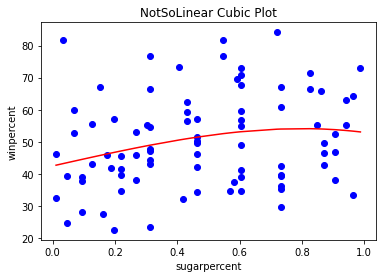

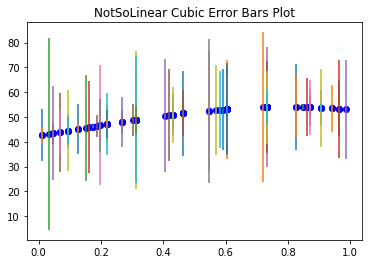

In [7]:
#8.2 NotSoLinear 
# Cubic Polynomials

cubic = PolynomialFeatures(3) #degree of 3
X_cube = cubic.fit_transform(X)

CubicRegressor = LinearRegression() # generate linear regression model
CubicRegressor.fit(X_cube, y) #training the algorithm

cube_prediction = CubicRegressor.predict(X_cube) #obtain predicted y values

plt.xlabel('sugarpercent')
plt.ylabel('winpercent')
plt.plot(X, cube_prediction, color='red') # plot line
plt.scatter(X, y,  color='blue') # plot points
plt.title("NotSoLinear Cubic Plot")
plt.show()

cubic_err = cube_prediction - y # error is difference between the predicted and actual value

for i in range(len(X)):
    plt.errorbar(X[i], cube_prediction[i], yerr=cubic_err[i]) # plot error bar for each point in dataset

plt.scatter(X, cube_prediction,  color='blue') # plot points
plt.title("NotSoLinear Cubic Error Bars Plot")
plt.show()


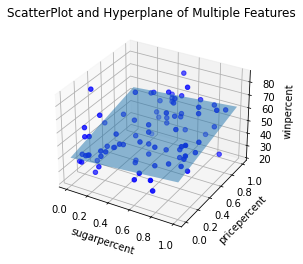

In [8]:
#8.3 Multiple 

new_X = df[['sugarpercent', 'pricepercent'] ] # add an additional feature to prediction

LinearRegressor3D = LinearRegression() # generate linear regression model
LinearRegressor3D.fit(new_X, y) #training the algorithm



coefficients = LinearRegressor3D.coef_[0] # obtain coefficents and intercept to plot the hyperplane
intercept = LinearRegressor3D.intercept_

x_axis = np.tile(np.arange(2), (1,1))
y_axis = np.tile(np.arange(2), (1,1)).T
z_axis = x_axis*coefficients[0] + y_axis*coefficients[1] + intercept

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_axis,y_axis,z_axis, alpha=0.5) #plot hyperplane
ax.scatter(new_X['sugarpercent'], new_X['pricepercent'],y, c='blue', marker='o') #plot points
ax.set_xlabel("sugarpercent")
ax.set_ylabel("pricepercent")
ax.set_zlabel("winpercent")
ax.set_title("ScatterPlot and Hyperplane of Multiple Features")
plt.show()

In [9]:
# 8.4 Regularize

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def best_regularization_paramter(training_set, validation_set, training_label, validation_label):
    """ Finds the best regularization parameter and its mean squared error
    :param training_set: training set as a dataframe
    :param validation_set: validation set as a dataframe
    :param training_label: label vector for training set
    :param validation_label: label vector for validation set 
    :return: best regularization parameter and its RMSE
    """
    lamdas = [0.1, 1, 2] # regularization parameters /lamdas

    min_mse_index = 0 # keep track of the best regularization parameter (minimum mse)
    min_mse = 0 # keep track of the best accuracy based on the regularization parameter 

    for i in range(len(lamdas)):
        ridge = Ridge(alpha=lamdas[i]) #create ridge for each of the different regularization parameters
        ridge.fit(training_set, training_label) # traing the ridge
        ridge_prediction = ridge.predict(validation_set) # obtain prediction
        mse = mean_squared_error(ridge_prediction, validation_label) #mean squared error of predicition
        if(i==0): # set min_mse to be mse of first lamda
            min_mse = mse
        
        if(mse < min_mse): #update min_mse
            min_mse = mse
            min_mse_index = i

        print("MSE of Ridge with lambda = "+ str(lamdas[i]) + ", is: " + str(mse))
            
    return lamdas[min_mse_index], min_mse

    
def find_useless_features(training_set, validation_set, training_label, validation_label):
    """ Finds the unhelpful features in the dataset -> features that have no effect on the MSE when removed from the ridge
    :param training_set: training set as a dataframe
    :param validation_set: validation set as a dataframe
    :param training_label: label vector for training set
    :param validation_label: label vector for validation set 
    :return: list of unhelpful features in dataset
    """
    # assuming regularization paramter is 1.0 for all ridges
    ridge = Ridge(alpha=1.0) # create a "basis" ridge to compare all other ridges to
    ridge.fit(training_set, training_label)
    ridge = ridge.predict(validation_set)
    original_mse = mean_squared_error(ridge, validation_label) # basis ridge mse
    print("Original mse: " + str(original_mse))
    useless_features = []
    temp_training_set = training_set
    temp_validation_set = validation_set
    for feature in training_set.columns: # for each feature, temporarily remove it from the dataset, create a new ridge, compare new ridge's mse with basis mse
        
        training_feature_removed = temp_training_set.pop(feature) #temporarily remove feature
        validation_featured_removed = temp_validation_set.pop(feature)
        ridge = Ridge(alpha=1.0) # create new ridge without the feature
        ridge.fit(temp_training_set, training_label)
        ridge_prediction = ridge.predict(temp_validation_set)
        mse = mean_squared_error(ridge_prediction, validation_label) # obtain new mse
        if(mse == original_mse): # check if new mse same as basis mse -> if so, it is a useless feature
            useless_features.append(feature)
        temp_training_set[feature] = training_feature_removed # add the feature back in to the dataset and repeat
        temp_validation_set[feature] = validation_featured_removed
    return useless_features



df = pd.get_dummies(df, 'competitorname') # one hot encoding of categorical feature
training_set, validation_set, training_label, validation_label = train_test_split(df.drop('winpercent', axis=1), df['winpercent'], train_size=0.7) # split 70% traing, 30% validation

lamda, mse = best_regularization_paramter(training_set, validation_set, training_label, validation_label) # find best regularization parameter
print()
print("Best regularization paramter is when lambda = "+ str(lamda) + ", and has an MSE of: " + str(mse))

useless_features = find_useless_features(training_set, validation_set, training_label, validation_label) # find useless features

print()
if(len(useless_features) == 0):
    print("Based on this training/validation split, no features were found to be useless!")
else:
    print("Based on this training/validation split, the following features were found to have no improvement on the MSE when removed from the dataset, hence they are useless:")
    for feature in useless_features:
        print(feature)




    



MSE of Ridge with lambda = 0.1, is: 140.76573469782207
MSE of Ridge with lambda = 1, is: 133.26267566755607
MSE of Ridge with lambda = 2, is: 128.72942271762267

Best regularization paramter is when lambda = 2, and has an MSE of: 128.72942271762267
Original mse: 133.26267566755607

Based on this training/validation split, no features were found to be useless!


# Note
Please note that "np.random.seed(1337)" in the first cell causes there to be no "useless" features when predicting the popularity of candy. If "np.random.seed(1337)" is removed, you can see that different features are "useless" based on the randomized of the 70/ training/validation splits.